# Example of TF-2 custom model

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build training data

In [2]:
n = 100
TRUE_W = 3.0
TRUE_b = 2.0

# random samples from normal distribution
np.random.seed(1)
r = np.random.normal(loc=0, scale=0.5, size=n)

# build data
inputs = np.random.normal(loc=0, scale=0.5, size=n)
outputs = TRUE_W * inputs + TRUE_b + r

# Define model

## Construct model

In [3]:
class Model(object):
    def __init__(self):
        # Initialize the weights to `5.0` and the bias to `0.0`
        # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.W * x + self.b

model = Model()

## Show model prediction before training

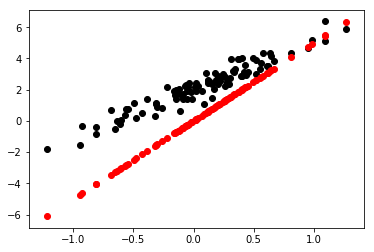

In [4]:
def plot_model(pred):
    plt.scatter(inputs, outputs, c='black')
    plt.scatter(inputs, pred, c='r')
    plt.show()
    
predictions = model(inputs)
plot_model(predictions)

# Train model

## Configure training

In [5]:
N_EPOCHS = 100
LEARNING_RATE = 0.1

def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

def train(model, inputs, outputs, learning_rate):
    # gradient descent
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

## Execute training

In [6]:
train(model, inputs, outputs, learning_rate=LEARNING_RATE, epochs=N_EPOCHS)

## Show model prediction after training

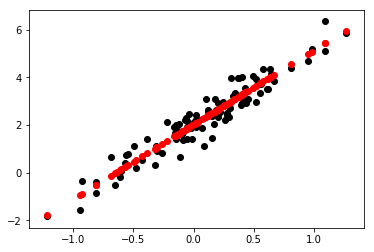

In [7]:
new_predictions = model(inputs)
plot_model(new_predictions)